# Titanic

## Team Member:

### Jiayu Chen  jic117   Huan Chen huc48  Chang Tian cht97

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re as re

train = pd.read_csv('./data/train.csv', header = 0, dtype={'Age': np.float64})
test  = pd.read_csv('./data/test.csv' , header = 0, dtype={'Age': np.float64})
full_data = [train, test]

print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

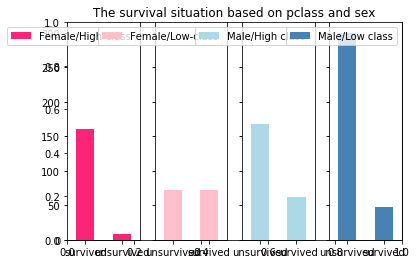

In [279]:
fig=plt.figure()
fig.set(alpha=0.65) 
plt.title(u"The survival situation based on pclass and sex")

ax1=fig.add_subplot(141)
train.Survived[train.Sex == 'female'][train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"survived", u"unsurvived"], rotation=0)
ax1.legend([u"Female/High-class"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
train.Survived[train.Sex == 'female'][train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"unsurvived", u"survived"], rotation=0)
plt.legend([u"Female/Low-class"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"unsurvived", u"survived"], rotation=0)
plt.legend([u"Male/High class"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"unsurvived", u"survived"], rotation=0)
plt.legend([u"Male/Low class"], loc='best')

plt.show()

# Feature Engineering

# 1. Pclass

In [280]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


# 2. Sex

In [281]:
print (train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


# 3. Family Size (SibSp and Parch)
With the number of siblings/spouse and the number of children/parents we can create new feature called Family Size.

In [282]:
for dataset in full_data:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1
print(train[["FamilySize","Survived"]].groupby(['FamilySize'],as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


# 4. IsAlone

In [283]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


# 5. Embarked

In [284]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


# 6. Title 
find the title of person from their names

In [285]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [286]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Sir', 'Mr')
    dataset['Title'] = dataset['Title'].replace('Lady', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

# CLEAN "TITLE" DATA
for dataset in full_data:
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset['Title'] = dataset['Title'].astype(int)


print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.704301
2      Mr  0.158301
3     Mrs  0.793651
4    Rare  0.285714
   Title  Survived
0      1  0.158301
1      2  0.704301
2      3  0.793651
3      4  0.575000
4      5  0.285714


# 7. Fare

In [10]:
train['CategoricalFare'] = pd.qcut(train['Fare'],5)
print (train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

for dataset in full_data:
    fare_avg 	   = dataset['Fare'].mean()
    fare_std 	   = dataset['Fare'].std()
    fare_null_count = dataset['Fare'].isnull().sum()
    
    fare_null_random_list = np.random.randint(fare_avg - fare_std, fare_avg + fare_std, size=fare_null_count)
    dataset.loc[dataset['Fare'].isnull(),'Fare'] = fare_null_random_list
   

print(test.info())

     CategoricalFare  Survived
0    (-0.001, 7.854]  0.217877
1      (7.854, 10.5]  0.201087
2     (10.5, 21.679]  0.424419
3   (21.679, 39.688]  0.444444
4  (39.688, 512.329]  0.642045
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


# 8. Age

In [288]:
from sklearn.ensemble import RandomForestRegressor

### using RandomForestClassifier to fill the missing data in Age Attribute 
def set_missing_ages(df):

    # put existing characters into Random Forest Regressor Model
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass','Title']]

    # customers can be separated into two category: known_age and unkown_age
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y means target age
    y = known_age[:, 0]

    # X means attribute feature
    X = known_age[:, 1:]

    # fit in RandomForestRegressor
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # predict the ages based on the model
    predictedAges = rfr.predict(unknown_age[:, 1::])

    # fill the predictive ages into the missing data
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges
    df['Age'] = df['Age'].astype(int)

    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

train.head()
train, rfr = set_missing_ages(train)
train = set_Cabin_type(train)

test, rfr = set_missing_ages(test)
test = set_Cabin_type(test)

train['CategoricalAge'] = pd.cut(train['Age'],6)
print (train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

print(train.info())
print(test.info())

     CategoricalAge  Survived
0   (-0.08, 13.333]  0.555556
1  (13.333, 26.667]  0.380952
2    (26.667, 40.0]  0.349296
3    (40.0, 53.333]  0.405405
4  (53.333, 66.667]  0.348837
5    (66.667, 80.0]  0.142857
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
Age                891 non-null int64
SibSp              891 non-null int64
Parch              891 non-null int64
Ticket             891 non-null object
Fare               891 non-null int64
Cabin              891 non-null object
Embarked           891 non-null object
FamilySize         891 non-null int64
IsAlone            891 non-null int64
Title              891 non-null int64
CategoricalFare    891 non-null category
CategoricalAge     891 non-null category
dtypes: category(2), int64(1

# 9. Person

In [289]:
def male_female_child_elder(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 14:
        return 'child'
    elif age >= 67:
        return 'elder'
    else:
        return sex
for data in full_data:
    data['Person'] = data[['Age', 'Sex']].apply(male_female_child_elder, axis=1)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,CategoricalFare,CategoricalAge,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,No,S,2,0,1,"(-0.001, 7.854]","(13.333, 26.667]",male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,Yes,C,2,0,3,"(39.688, 512.329]","(26.667, 40.0]",female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,No,S,1,1,2,"(7.854, 10.5]","(13.333, 26.667]",female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,Yes,S,2,0,3,"(39.688, 512.329]","(26.667, 40.0]",female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,No,S,1,1,1,"(7.854, 10.5]","(26.667, 40.0]",male


# Data cleaning

In [291]:
for dataset in full_data:
    # Mapping Person
    dataset['Person'] = dataset['Person'].map( {'female': 0, 'male': 1,'child':2, 'elder':3} ).astype(int)
       
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] 						          = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare']    = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare'] = 3
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] 							      = 4
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    #Mapping Title
    
    
    # Mapping Age
    dataset.loc[ dataset['Age'] < 14, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] >= 14) & (dataset['Age'] < 27), 'Age'] = 1
    dataset.loc[(dataset['Age'] >= 27) & (dataset['Age'] < 40), 'Age'] = 2
    dataset.loc[(dataset['Age'] >= 40) & (dataset['Age'] < 54), 'Age'] = 3
    dataset.loc[(dataset['Age'] >= 54) & (dataset['Age'] < 67), 'Age'] = 4
    dataset.loc[ dataset['Age'] >= 67, 'Age']                          = 5

# Feature Selection
drop_elements = ['Name','Sex','Ticket', 'Cabin', 'SibSp','Parch']

train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

test  = test.drop(drop_elements, axis = 1)

print (train.head(20))


    PassengerId  Survived  Pclass  Age  Fare  Embarked  FamilySize  IsAlone  \
0             1         0       3    1     0         0           2        0   
1             2         1       1    2     4         1           2        0   
2             3         1       3    1     0         0           1        1   
3             4         1       1    2     4         0           2        0   
4             5         0       3    2     1         0           1        1   
5             6         0       3    2     1         2           1        1   
6             7         0       1    4     4         0           1        1   
7             8         0       3    0     2         0           5        0   
8             9         1       3    2     2         0           3        0   
9            10         1       2    1     3         1           2        0   
10           11         1       3    0     2         0           3        0   
11           12         1       1    4     3        

# load inputs (training set and test set)

In [292]:
features = ['Pclass', 'Age',  'Fare', 'Embarked', 'FamilySize','IsAlone','Title','Person'] 
X_train = train[features]
y_train = train['Survived']
X_test = test[features]

inputs = X_train, y_train, X_test

# Model Selection

In [293]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


def models():
    return [LogisticRegression(),
            SVC(),
            LinearSVC(),
            RandomForestClassifier(),
            KNeighborsClassifier(),
            GaussianNB(),
            DecisionTreeClassifier()]

In [297]:
def name(model):
    return model.__class__.__name__


def best_model(model2predict):
    score_df = series_best_first(model2predict)
    print(score_df)
    return score_df.keys()[0]


def series_best_first(model2predict):
    model2score = {k: v[1] for k, v in model2predict.items()}
    return pd.Series(model2score).sort_values(ascending=False)


def write_submission(predict, submission_csv):
    submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predict
    })
    submission.to_csv(submission_csv, index=False)
    return pd.read_csv(submission_csv).tail(10)

# Model Selection based on the score method¶


In [298]:
def predict_and_score(model, inputs):
    X, y, X_test = inputs
    model.fit(X, y)
    y_pred = model.predict(X_test)
    return y_pred, model.score(X, y)


table = {name(m): predict_and_score(m, inputs) for m in models()}
model = best_model(table)
write_submission(table[model][0], 'submission.csv')

DecisionTreeClassifier    0.894501
RandomForestClassifier    0.888889
KNeighborsClassifier      0.854097
SVC                       0.842873
LinearSVC                 0.802469
GaussianNB                0.793490
LogisticRegression        0.792368
dtype: float64


,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,0
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


In [299]:
from sklearn.model_selection import cross_val_score

In [300]:
def predict_and_cv_score(model, inputs):
    X, y, X_test = inputs
    score = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    model.fit(X, y)
    return model.predict(X_test), score


table = {name(m): predict_and_cv_score(m, inputs) for m in models()}
model = best_model(table)
write_submission(table[model][0], 'submission_sv.csv')

SVC                       0.824877
KNeighborsClassifier      0.818224
RandomForestClassifier    0.813754
DecisionTreeClassifier    0.804765
LinearSVC                 0.798086
LogisticRegression        0.792531
GaussianNB                0.778073
dtype: float64


,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,1
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


# Improve prediction by parameter tuning¶

KNN example¶

In [302]:
from sklearn.model_selection import train_test_split

X = train[features]
y = train['Survived']
X_test = test[features]

X_cv_train, X_cv_test, y_cv_train, y_cv_test = train_test_split(X, y, random_state=6)

In [303]:
# k = 5 (default) for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_cv_train, y_cv_train, cv=10, scoring='accuracy')
scores

array([0.77941176, 0.89552239, 0.86567164, 0.70149254, 0.91044776,
       0.7761194 , 0.74626866, 0.78787879, 0.8030303 , 0.84848485])

In [304]:
scores.mean()

0.8114328092159523

In [305]:
k_range = range(1, 31)

k_cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_cv_train, y_cv_train, cv=10, scoring='accuracy')
    k_cv_scores.append(scores.mean())
    
k_cv_scores

[0.7622196504110464,
 0.774004975124378,
 0.7919387022108707,
 0.7993801048234762,
 0.8114328092159523,
 0.8158871418309521,
 0.8069545321520739,
 0.820409982174688,
 0.8069099688722166,
 0.8143493761140821,
 0.8129472956075239,
 0.8099163274536408,
 0.8099622209806581,
 0.8099163274536408,
 0.8203880330965493,
 0.814417883842818,
 0.8054387155133422,
 0.8159104211562507,
 0.808424455263788,
 0.8129014020805065,
 0.8129027323276665,
 0.8083133796259345,
 0.814417883842818,
 0.8067975629872031,
 0.8113875808125149,
 0.803834437438476,
 0.7979088514646021,
 0.7904228855721392,
 0.7963943650730305,
 0.7843855588368319]

In [306]:
print('Length of list', len(k_cv_scores))
print('Max of list', max(k_cv_scores))

Length of list 30
Max of list 0.820409982174688


In [307]:
from sklearn import metrics

k_test_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_cv_train, y_cv_train)
    y_pred = knn.predict(X_cv_test)
    k_test_scores.append(metrics.accuracy_score(y_cv_test, y_pred))

Test: K= 11
CV K= 8


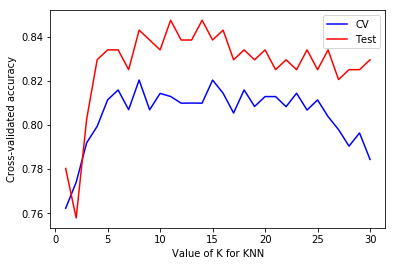

In [308]:
plt.plot(k_range, k_cv_scores, color='b', label='CV')
plt.plot(k_range, k_test_scores, color='r', label = 'Test')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.legend()
k_test_best = np.argmax(k_test_scores) + 1
print('Test: K=', k_test_best)
k_cv_best = np.argmax(k_cv_scores) + 1
print('CV K=', k_cv_best)

In [309]:
knn_cv = KNeighborsClassifier(n_neighbors=k_cv_best)
knn_cv.fit(X_train, y_train)
y_cv_pred = knn_cv.predict(X_test)
write_submission(y_cv_pred, 'submission_knn_cv.csv')

,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,0
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


In [310]:
knn_test = KNeighborsClassifier(n_neighbors=k_test_best)
knn_test.fit(X_train, y_train)
y_test_pred = knn_test.predict(X_test)
write_submission(y_test_pred, 'submission_knn_test.csv')

,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,1
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


# Questions：

## 1.How did you do to wrangle, prepare, cleanse the data?
   

As shown above, we first load,explore the data with Python and find that some data(age,cabin,embarked,fare) are missing. After analyzing the data, we find that "cabin" is related to "Pclass" and lacks a lot of data. So we prefer not to choose "cabin" as 
a feature of machine learing. So we don't fill the missing data of cabin. However, "age","embarked" and "fare" play important roles in deciding whether a passenger will survive in Titanic. So we fill the missing "age" data with RandomForestClassifier. Also, we fill the missing "fare" data based on the average value and standard deviation value of other values. Considering only 2 "embarked" values are missing, we just fill them with "s" value.
 


Then we try to transform everthing into digits and partion some features for conducting machine learning better. For example, we partition "age" values to several sections. [0,13]->0,[14,26]->1,[27,39]->2,[40,53]->3,[54,66]->4,over 66 ->5.
You can see more detailed information in Features engineering and Data cleaning parts.

## 2.How did you analyze, identify patterns, and explore the data?

We use charts and tables to get the relationships between features and survival rate. We analyze each feature along with the survival rate. We also combine the data with common sense. In common sense, women and children are more likely to be protected when an accident happens. As we explore the data, the survival rate of women and children is actually higher than others. As a result, we can find which features do affect survival rate of passengers. Like in "sex" feature, we can find that women are far more likely to survive in the disaster which means we need to consider the "sex" feature as an element in our machine learning.

## 3.Improve prediction from the lab and pick the best to submit to kaggle.com:   

### a. What are the models you ran (you should run at least 5)?

DecisionTreeClassifier    
RandomForestClassifier   
KNeighborsClassifier      
SVC         
LinearSVC                 
GaussianNB     
LogisticRegression    

### b.What are the features/variables in the data you chose to build your models?

Pclass

Age: We categorize this feature into 6 ranges according to the same age difference.

Fare: We categorize this feature into 5 ranges, each category include the same number of people.  

Embarked

FamilySize: With the number of siblings/spouse and the number of children/parents we create new feature called Family Size.
Is Alone: We create this new feature to show whether this person is alone without other family members.

Title: We extract the title of people from the feature of Name

Person: We add a feature person which group the people under 14 as child and greater or equal to 67 as ‘elder’ and others are the same as the feature of Sex.

### c.How and why did you pick the features/variables?

In the Feature Engineering part of our work, we analyze every feature and classify them into groups in order to see the relationship between each group and the mean value of Survived feature. After observing the result of each relationship, if one feature has an impact on the Survived, we will pick it into training dataframe.

### d.What is the model you picked to submit and its score rated by kaggle.com (it should be higher than 0.75598)?

The model we picked to submit is DecisionTree.
The score rated by kaggle.com is 0.7846

### e.What is/are the parameter value/values as a result of your parameter tuning?

In the KNeighborsClassifier model, the parameter of k is 18.
In other models, we use the default values as our parameter.

### f.How did you pick the value(s)?

In the KNeighborsClassifier model, we change the value of k from 1 to 31 and find that at first the accuracy number show an increasing trend and then decrease. Thus we choose the k value with the max accuracy value.

## 4.Answer the below questions about SettingWithCopyWarning in pandas

 ### a.What is SettingWithCopyWarning? Please summarize.

Some actions in pandas can return a view of data and some will return a copy. When we conduct some actions with pandas, these actions may be set on a copy of the original data set. This often happens when we try to chain two indexing operations together. This warning will remind you that sometimes your operations do not act as expected. You need to check the result of your operations to avoid mistakes.

### b.How did you make sure that the warning is not applicable in your cases?

We use ".loc" to prevent this warning.

### c.What can you do to avoid the warning according to the web? Please summarize.

There are several ways to avoid the warning:
 1. Use code like "loc/iloc" to tell the system which dataset you actually use.
 2. Turn off the warning: "pd.options.mode.chained_assignment = None"

### d.(extra points) What else can you do to avoid the warning? Please explain.

 We can create a new copy of the original dataset so that these operations will not affect on original data.

## Add-on Links:

### 1.Kaggle Submission Link:

https://www.kaggle.com/huanchen0816

### 2.Some references: 


https://www.kaggle.com/sinakhorami/titanic-best-working-classifier;  https://github.com/chirayukong/infsci2725-spring-2018/blob/master/lecture-06/Titanic_Lab.ipynb;  http://blog.csdn.net/guoxinian/article/details/73740746